In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

Using TensorFlow backend.


TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.8.0


In [2]:
#!pip install keras==2.2.4

In [3]:
def resize_image(im, max_size=768):
    if np.max(im.shape) > max_size:
        ratio = max_size / np.max(im.shape)
        print(f"Resize image to ({str(int(im.shape[1]*ratio))}, {str(int(im.shape[0]*ratio))}).")
        return cv2.resize(im, (0,0), fx=ratio, fy=ratio)
    return im

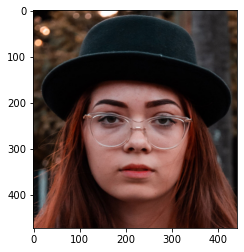

In [4]:
# Test images are obtained on https://www.pexels.com/
im = cv2.imread("images/test.jpg")[..., ::-1]
im = resize_image(im) # Resize image to prevent GPU OOM.
h, w, _ = im.shape
plt.imshow(im)

In [5]:
from models.detector import face_detector
fd = face_detector.FaceAlignmentDetector(
    lmd_weights_path="./models/detector/FAN/2DFAN-4_keras.h5"# 2DFAN-4_keras.h5, 2DFAN-1_keras.h5
)

In [6]:
bboxes = fd.detect_face(im, with_landmarks=False)

/Users/thuongle/Desktop/Center/face_toolbox_keras/models/detector/s3fd/s3fd_detector.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bboxlist = np.array(bboxlist)
/Users/thuongle/Desktop/Center/face_toolbox_keras/models/detector/face_detector.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return [np.array([bbox[1], bbox[0], bbox[3], bbox[2], bbox[4]]) for bbox in bbox_list]


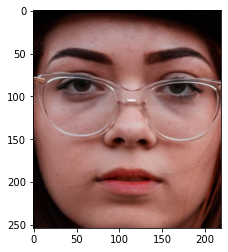

In [7]:
assert len(bboxes) > 0, "No face detected."

# Display detected face
x0, y0, x1, y1, score = bboxes[0] # show the first detected face
x0, y0, x1, y1 = map(int, [x0, y0, x1, y1])

plt.imshow(im[x0:x1, y0:y1, :])

In [8]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")
from models.verifier.face_verifier import FaceVerifier

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.8.0


In [71]:
def resize_image(im, max_size=768):
    if np.max(im.shape) > max_size:
        ratio = max_size / np.max(im.shape)
        #print(f"Resize image to ({str(int(im.shape[1]*ratio))}, {str(int(im.shape[0]*ratio))}).")
        return cv2.resize(im, (0,0), fx=ratio, fy=ratio)
    return im

In [10]:
im1 = cv2.imread("./0000028.jpg")[..., ::-1]
im1 = resize_image(im1) # Resize image to prevent GPU OOM.
im2 = cv2.imread("./0000665.jpg")[..., ::-1]
im2 = resize_image(im2) # Resize image to prevent GPU OOM.


Resize image to (573, 768).
Resize image to (573, 768).


In [14]:
im_1 = cv2.imread("./src.png")[..., ::-1]
im_1 = resize_image(im_1) # Resize image to prevent GPU OOM.
im_2 = cv2.imread("./target.png")[..., ::-1]
im_2 = resize_image(im_2) # Resize image to prevent GPU OOM.


In [15]:
fv = FaceVerifier(classes=512, extractor="facenet") # extractor="insightface"

In [16]:
fv.set_detector(fd)

In [21]:
# Face verification
result1, distance1 = fv.verify(im_1, im_2, threshold=0.5, with_detection=True, with_alignment=False, return_distance=True)

Multiple faces detected, only the most confident one is used for verification.


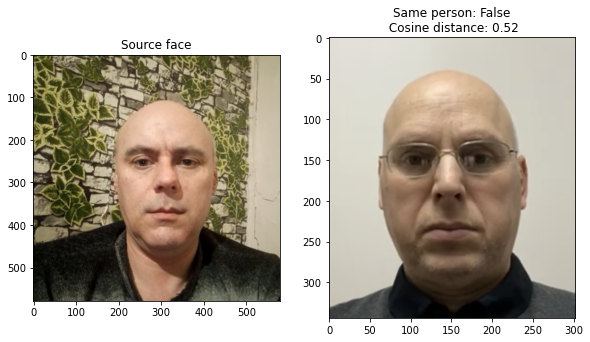

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title(f"Source face")
plt.imshow(im_1)
plt.subplot(1,3,2)
plt.title(f"Same person: {str(result1)}\n Cosine distance: {str(round(distance1, 2))}")
plt.imshow(im_2)

In [25]:
def result_face_verify(src_path,target_path):
    src = cv2.imread(src_path)[..., ::-1]
    src = resize_image(src) # Resize image to prevent GPU OOM.
    target = cv2.imread(target_path)[..., ::-1]
    target = resize_image(target) # Resize image to prevent GPU OOM.

    # Face verification
    result1, distance1 = fv.verify(src, target, threshold=0.5, with_detection=True, with_alignment=False, return_distance=True)
    plt.figure(figsize=(15,6))
    plt.subplot(1,3,1)
    plt.title(f"Source face")
    plt.imshow(src)
    plt.subplot(1,3,2)
    plt.title(f"Same person: {str(result1)}\n Cosine distance: {str(round(distance1, 2))}")
    plt.imshow(target)

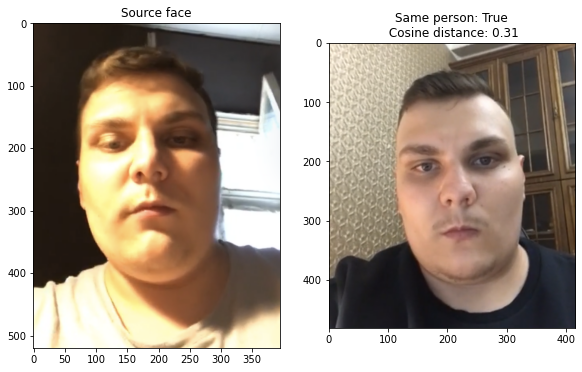

In [26]:
result_face_verify("./src_1.png","./target_1.png")

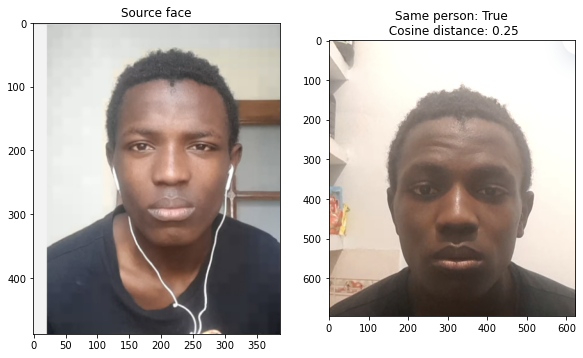

In [27]:
result_face_verify("./src_2.png","./target_2.png")

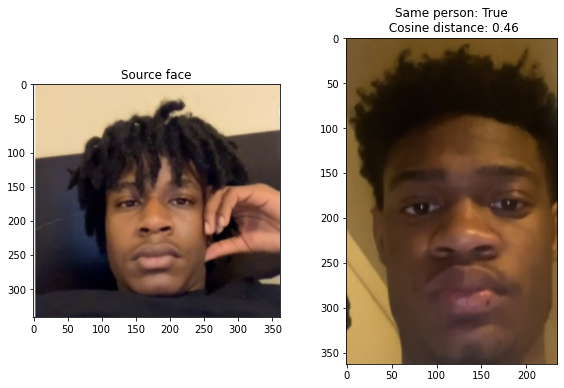

In [28]:
result_face_verify("./src_3.png","./target_3.png")

Resize image to (573, 768).
Resize image to (573, 768).


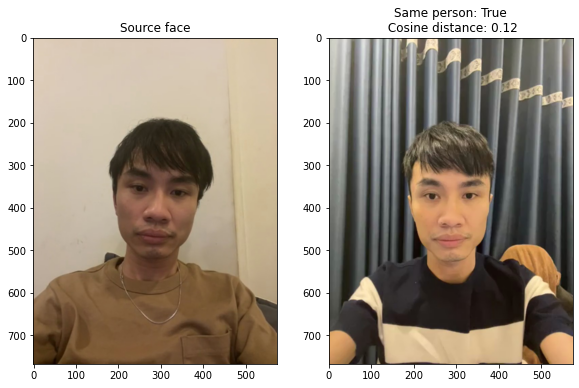

In [29]:
result_face_verify("./0000028.jpg","./0000665.jpg")

In [72]:
import os 
PATH = "./img_src/"
dirs = os.listdir(PATH)
print(len(dirs))

112


In [73]:
def result_face_verify_obj(src_path,target_path):
    src = cv2.imread(src_path)[..., ::-1]
    src = resize_image(src) # Resize image to prevent GPU OOM.
    target = cv2.imread(target_path)[..., ::-1]
    target = resize_image(target) # Resize image to prevent GPU OOM.

    # Face verification
    result, distance = fv.verify(src, target, threshold=0.5, with_detection=True, with_alignment=False, return_distance=True)
    return src,target,result, distance

In [74]:
def plot_after_result(src,target,result,distance,src_path):
    plt.figure(figsize=(15,6))
    plt.subplot(1,3,1)
    title =  src_path.split('.')[len(src_path.split('.'))-2]
    plt.title(title)
    plt.imshow(src)
    plt.subplot(1,3,2)
    plt.title(f"Same person: {str(result)}\n Cosine distance: {str(round(distance, 2))}")
    plt.imshow(target)

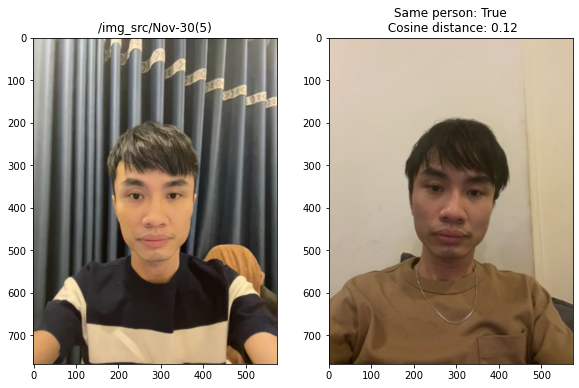

In [75]:

import os 
PATH = "./img_src/"
dirs = os.listdir(PATH)
target_path= "./0000028.jpg"
for file in dirs:
    if file.split('.')[1] == "png":
        src_path= PATH + file
        src,target,result, distance= result_face_verify_obj(src_path,target_path)
        if result and distance < 0.35: # laay 65%
            plot_after_result(src,target,result,distance,src_path)
            
